In [1]:
import numpy as py
import pandas as pd

In [2]:
df = pd.read_csv('../data/raw/used_cars.csv')

## Data Exploration

In [3]:
print("Shape: ", df.shape)
print("=== Basic Info ===")
print(df.info())

Shape:  (38531, 30)
=== Basic Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-nu

In [4]:
print("=== Missing Value ===")
# electirc_car = df[df['engine_type'] == 'electric']
print(df.isnull().sum())
# print(electirc_car)

=== Missing Value ===
manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64


In [5]:
print("=== Duplicates ===")
print(f"Duplicated rows: {df.duplicated().sum()}")

print("\n=== Data Types ===")
print(df.dtypes)

=== Duplicates ===
Duplicated rows: 40

=== Data Types ===
manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object


## Categorial/Numerical Columns

In [6]:
categ_cols = df.select_dtypes(include=['object', 'category']).columns.to_list()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.to_list()
bool_cols = df.select_dtypes(include=['bool']).columns.to_list()
print("Category Cols: ", categ_cols)
print("\nNumerical Cols: ", num_cols)
print("\nBoolean Cols: ", bool_cols)

Category Cols:  ['manufacturer_name', 'model_name', 'transmission', 'color', 'engine_fuel', 'engine_type', 'body_type', 'state', 'drivetrain', 'location_region']

Numerical Cols:  ['odometer_value', 'year_produced', 'engine_capacity', 'price_usd', 'number_of_photos', 'up_counter', 'duration_listed']

Boolean Cols:  ['engine_has_gas', 'has_warranty', 'is_exchangeable', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9']


### Numerical Column Stats

In [7]:
print(df[num_cols].describe())

       odometer_value  year_produced  engine_capacity     price_usd  \
count    38531.000000   38531.000000     38521.000000  38531.000000   
mean    248864.638447    2002.943734         2.055161   6639.971021   
std     136072.376530       8.065731         0.671178   6428.152018   
min          0.000000    1942.000000         0.200000      1.000000   
25%     158000.000000    1998.000000         1.600000   2100.000000   
50%     250000.000000    2003.000000         2.000000   4800.000000   
75%     325000.000000    2009.000000         2.300000   8990.000000   
max    1000000.000000    2019.000000         8.000000  50000.000000   

       number_of_photos    up_counter  duration_listed  
count      38531.000000  38531.000000     38531.000000  
mean           9.649062     16.306091        80.577249  
std            6.093217     43.286933       112.826569  
min            1.000000      1.000000         0.000000  
25%            5.000000      2.000000        23.000000  
50%            8.0

## Column Analysis

In [8]:
for col in categ_cols:
    print(f"\n{col}:")
    print(f"    Unique values: {df[col].unique()}")
    print(f"  Missing: {df[col].isnull().sum()} ({df[col].isnull().sum()/len(df)*100:.1f}%)")
    
    if df[col].nunique() <= 15:
        print(f"  Value counts:")
        print(df[col].value_counts())
    else:
        print(f"  Top 10 values:")
        print(df[col].value_counts().head(10))


manufacturer_name:
    Unique values: ['Subaru' 'LADA' 'Dodge' 'УАЗ' 'Kia' 'Opel' 'Москвич' 'Alfa Romeo' 'Acura'
 'Dacia' 'Lexus' 'Mitsubishi' 'Lancia' 'Citroen' 'Mini' 'Jaguar' 'Porsche'
 'SsangYong' 'Daewoo' 'Geely' 'ВАЗ' 'Fiat' 'Ford' 'Renault' 'Seat' 'Rover'
 'Volkswagen' 'Lifan' 'Jeep' 'Cadillac' 'Audi' 'ЗАЗ' 'Toyota' 'ГАЗ'
 'Volvo' 'Chevrolet' 'Great Wall' 'Buick' 'Pontiac' 'Lincoln' 'Hyundai'
 'Nissan' 'Suzuki' 'BMW' 'Mazda' 'Land Rover' 'Iveco' 'Skoda' 'Saab'
 'Infiniti' 'Chery' 'Honda' 'Mercedes-Benz' 'Peugeot' 'Chrysler']
  Missing: 0 (0.0%)
  Top 10 values:
manufacturer_name
Volkswagen       4243
Opel             2759
BMW              2610
Ford             2566
Renault          2493
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1562
Nissan           1361
Name: count, dtype: int64

model_name:
    Unique values: ['Outback' 'Forester' 'Impreza' ... '180' 'Vision' 'Aspen']
  Missing: 0 (0.0%)
  Top 10 values:
model_name
Passat    1423
Astra

In [9]:
key_numerical = ['price_usd', 'odometer_value', 'year_produced', 'engine_capacity']
print("\n--- KEY NUMERICAL OUTLIER CHECK ---")
for col in key_numerical:
    if col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")

print("\n--- BOOLEAN COLUMNS ---")
for col in bool_cols:
    print(f"{col}:")
    print(df[col].value_counts())


--- KEY NUMERICAL OUTLIER CHECK ---
price_usd: 1744 outliers (4.5%)
odometer_value: 564 outliers (1.5%)
year_produced: 242 outliers (0.6%)
engine_capacity: 2006 outliers (5.2%)

--- BOOLEAN COLUMNS ---
engine_has_gas:
engine_has_gas
False    37184
True      1347
Name: count, dtype: int64
has_warranty:
has_warranty
False    38082
True       449
Name: count, dtype: int64
is_exchangeable:
is_exchangeable
False    24945
True     13586
Name: count, dtype: int64
feature_0:
feature_0
False    29725
True      8806
Name: count, dtype: int64
feature_1:
feature_1
True     23396
False    15135
Name: count, dtype: int64
feature_2:
feature_2
False    29907
True      8624
Name: count, dtype: int64
feature_3:
feature_3
False    27904
True     10627
Name: count, dtype: int64
feature_4:
feature_4
False    29227
True      9304
Name: count, dtype: int64
feature_5:
feature_5
False    24811
True     13720
Name: count, dtype: int64
feature_6:
feature_6
False    31943
True      6588
Name: count, dtype: int64

## Handling Missing Values

In [10]:
def handle_missing_values(df):
    "Handle missing values"
    df_clean = df.copy()

    print("== Handle Missing Values ==")
    
    #For electric car 
    missing_engine = df_clean['engine_capacity'].isnull().sum()
    df_clean['engine_capacity'] = df_clean['engine_capacity'].fillna(0.0)
    df_clean['is_electric'] = df_clean['engine_capacity'] == 0.0
    print(f"Set {missing_engine} missing engine capacity values to 0 (Electric cars)")

    print(f"Data after handling missing value: {len(df_clean)} rows")
    return df_clean

df_clean = handle_missing_values(df)


== Handle Missing Values ==
Set 10 missing engine capacity values to 0 (Electric cars)
Data after handling missing value: 38531 rows


## Visualisation Distribution of data 

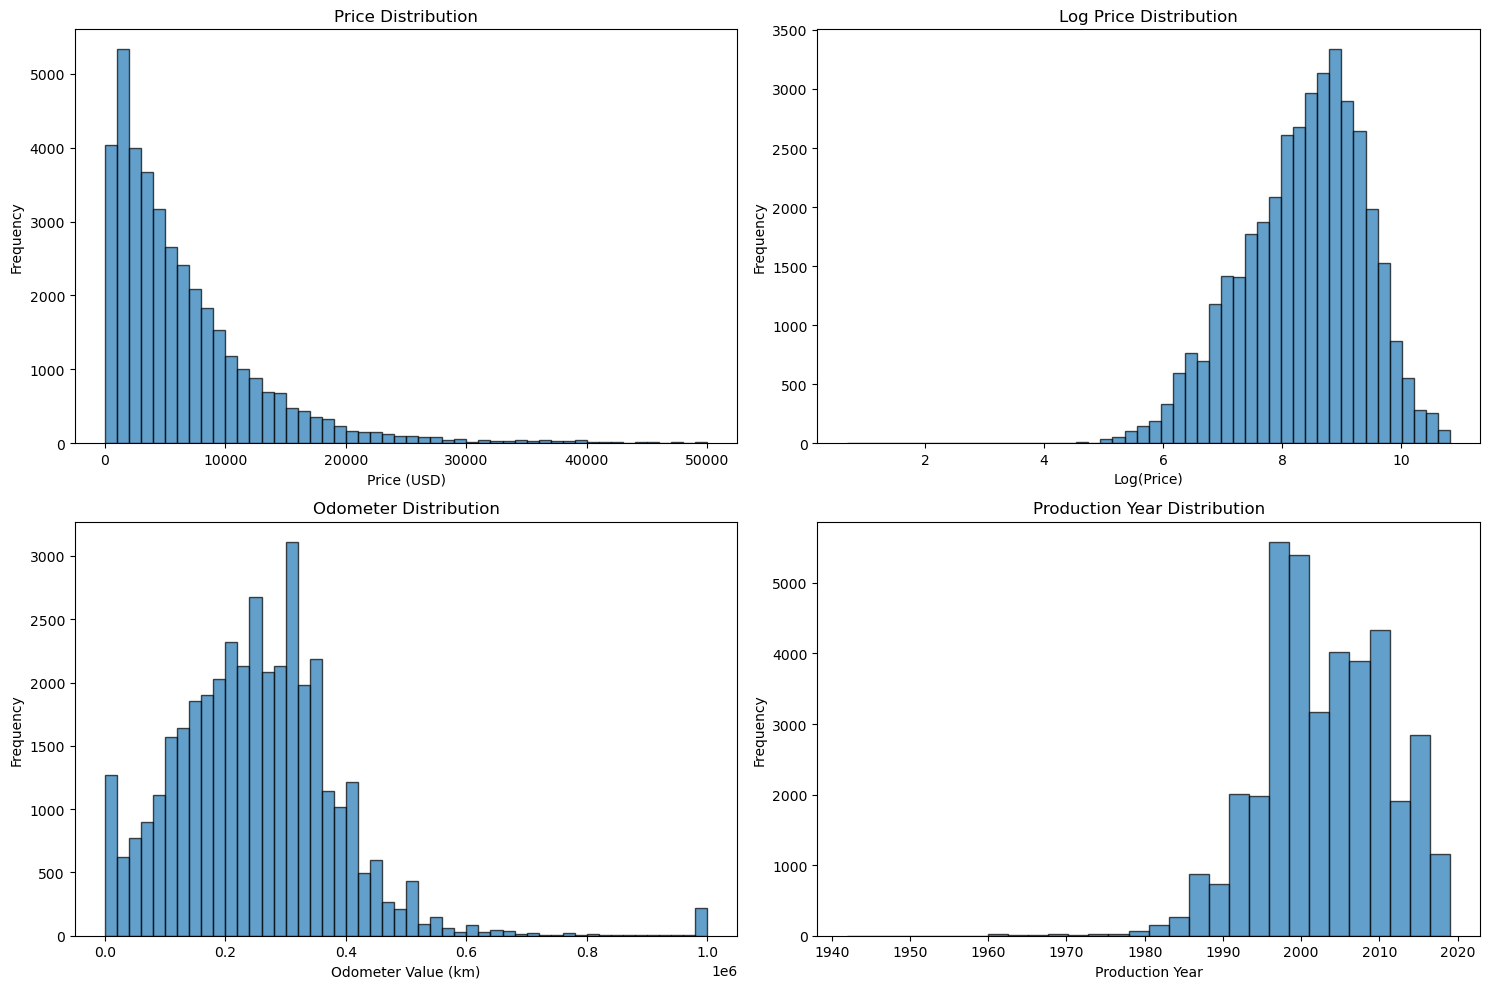

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

#Price
axes[0,0].hist(df_clean['price_usd'], bins=50, edgecolor='black', alpha=0.7)
axes[0,0].set_title('Price Distribution')
axes[0,0].set_xlabel('Price (USD)')
axes[0,0].set_ylabel('Frequency')

#Log pirce
axes[0,1].hist(py.log1p(df_clean['price_usd']), bins=50, edgecolor='black', alpha=0.7)
axes[0,1].set_title('Log Price Distribution')
axes[0,1].set_xlabel('Log(Price)')
axes[0,1].set_ylabel('Frequency')

#Odomoter
axes[1,0].hist(df_clean['odometer_value'], bins=50, edgecolor='black', alpha=0.7)
axes[1,0].set_title('Odometer Distribution')
axes[1,0].set_xlabel('Odometer Value (km)')
axes[1,0].set_ylabel('Frequency')

#Year produced
axes[1,1].hist(df_clean['year_produced'], bins = 30, edgecolor='black', alpha=0.7)
axes[1,1].set_title("Production Year Distribution")
axes[1,1].set_xlabel('Production Year')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

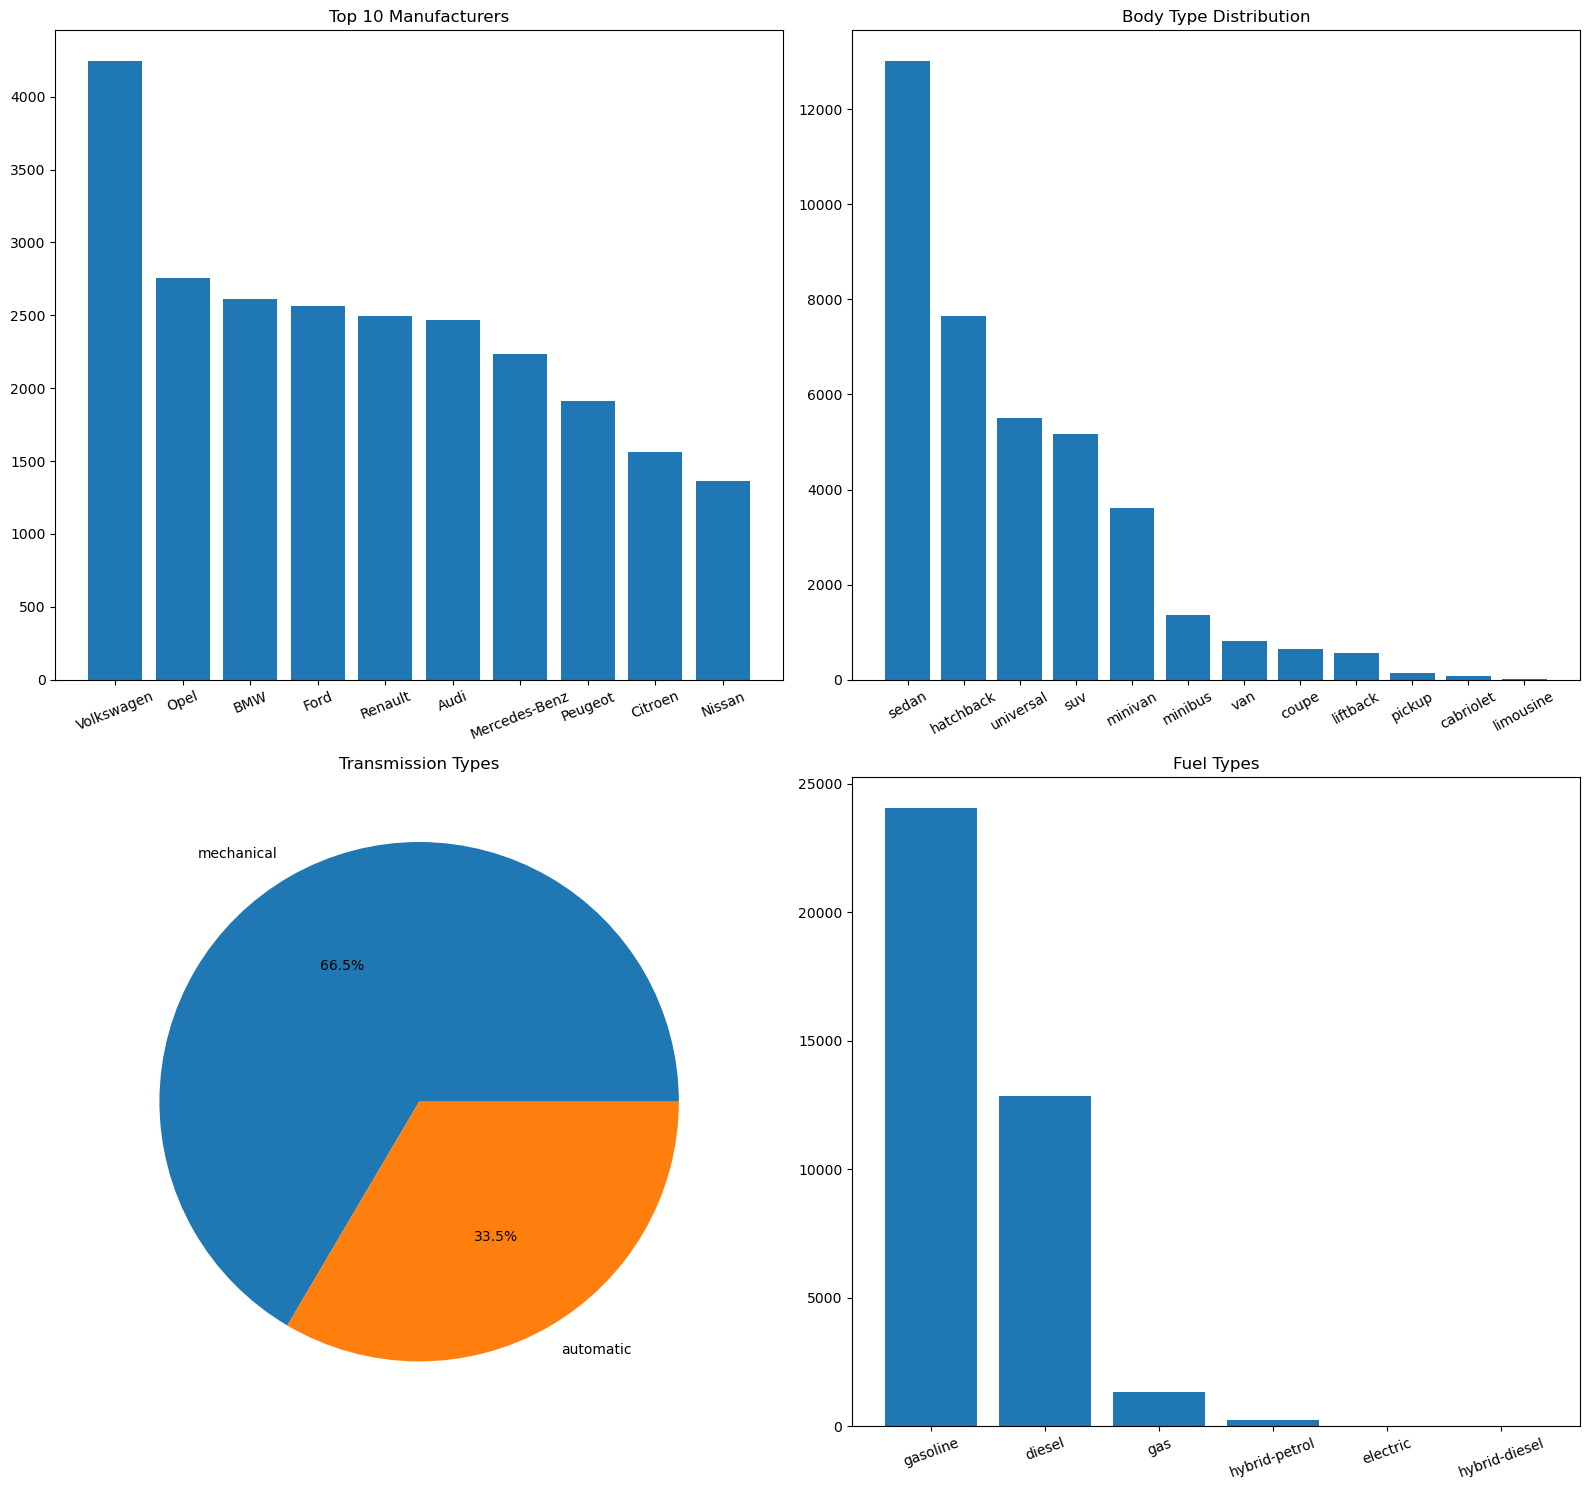

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(16,15))

top_manufacturers = df_clean['manufacturer_name'].value_counts().head(10)
axes[0,0].bar(top_manufacturers.index, top_manufacturers.values)
axes[0,0].set_title('Top 10 Manufacturers')
axes[0,0].tick_params(axis='x', rotation=22)

body_types = df_clean['body_type'].value_counts()
axes[0,1].bar(body_types.index, body_types.values)
axes[0,1].set_title('Body Type Distribution')
axes[0,1].tick_params(axis='x', rotation=29)

transmission = df_clean['transmission'].value_counts()
axes[1,0].pie(transmission.values, labels=transmission.index, autopct='%1.1f%%')
axes[1,0].set_title('Transmission Types')

fuel_types = df_clean['engine_fuel'].value_counts()
axes[1,1].bar(fuel_types.index, fuel_types.values)
axes[1,1].set_title('Fuel Types')
axes[1,1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()


## Relationship visualisation

Text(0, 0.5, 'Average Price (USD)')

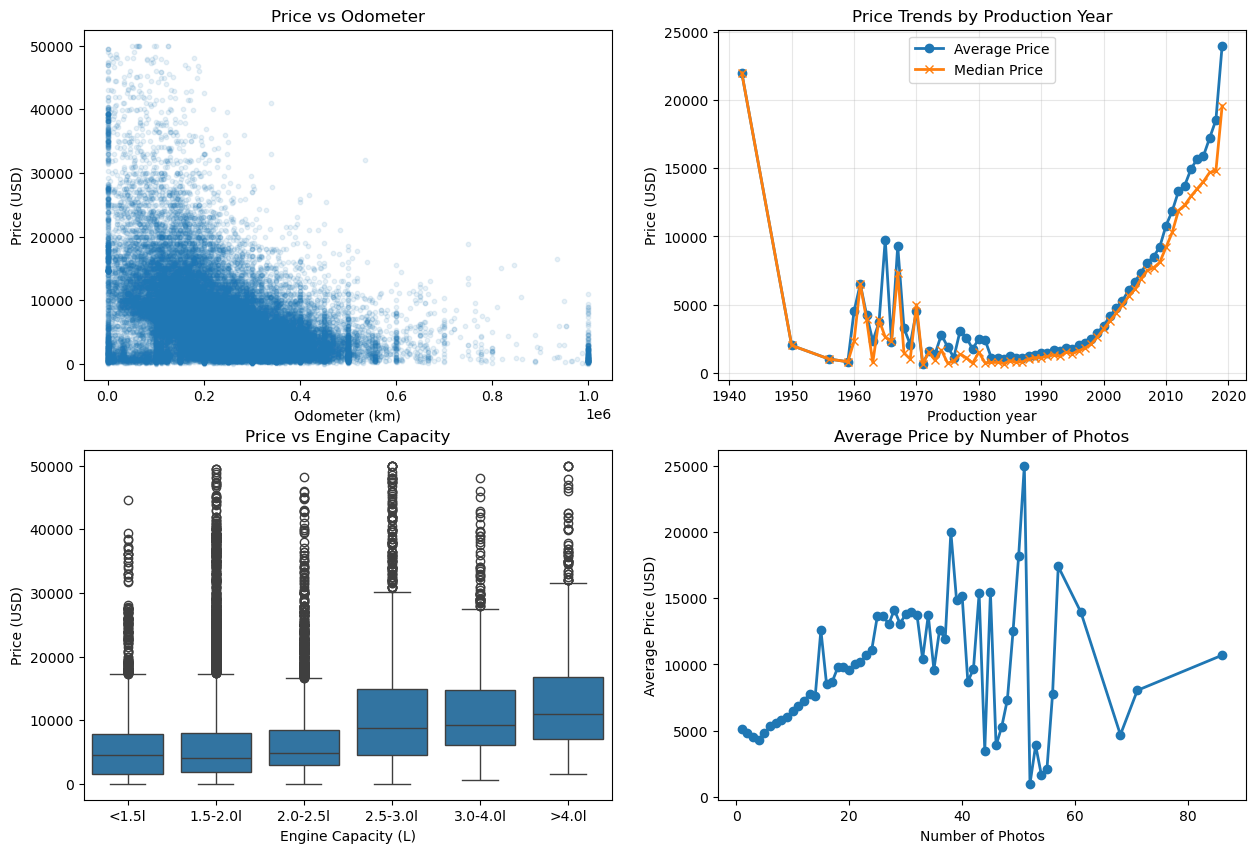

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

#Price vs Odometer

axes[0,0].scatter(df_clean['odometer_value'], df_clean['price_usd'], alpha=0.1, s=10)
axes[0,0].set_title("Price vs Odometer")
axes[0,0].set_xlabel("Odometer (km)")
axes[0,0].set_ylabel("Price (USD)")

#Price vs Year produced
price_by_year = df_clean.groupby('year_produced')['price_usd'].agg(['mean', 'median', 'count']).reset_index()
axes[0,1].plot(price_by_year['year_produced'], price_by_year['mean'], marker='o', linewidth=2, label='Average Price')
axes[0,1].plot(price_by_year['year_produced'], price_by_year['median'], marker='x', linewidth=2, label='Median Price')
axes[0,1].set_title('Price Trends by Production Year')
axes[0,1].set_xlabel('Production year')
axes[0,1].set_ylabel('Price (USD)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)
# axes[0,1].scatter(df_clean['year_produced'], df_clean['price_usd'], alpha=0.3)
# axes[0,1].set_title("Price vs Odometer")
# axes[0,1].set_xlabel("Production Year")
# axes[0,1].set_ylabel("Price (USD)")

#Price vs Engine Capacity
df_clean['engine_capacity_bin'] = pd.cut(df_clean['engine_capacity'],
                                         bins=[0, 1.5, 2.0, 2.5, 3.0, 4.0, 10],
                                         labels=['<1.5l', '1.5-2.0l', '2.0-2.5l', '2.5-3.0l', '3.0-4.0l', '>4.0l'])
sns.boxplot(data=df_clean, x='engine_capacity_bin', y='price_usd', ax=axes[1,0])
axes[1,0].set_title("Price vs Engine Capacity")
axes[1,0].set_xlabel("Engine Capacity (L)")
axes[1,0].set_ylabel("Price (USD)")

# Price vs Number of Photos
# df_clean['photos_bin'] = pd.cut(df_clean['number_of_photos'],
#                                 bins=[0,5,10,15,20,50,100],
#                                 labels=['1-5', '6-10', '11-15', '16-20', '21-50', '50+'])
# sns.boxplot(data=df_clean, x='photos_bin', y='price_usd', ax=axes[1,1])
# axes[1,1].set_title("Price vs Number of Photos")
# axes[1,1].set_xlabel("Number of Photos")
# axes[1,1].set_ylabel("Price (USD)")

photos_avg_price = df_clean.groupby('number_of_photos')['price_usd'].mean()
axes[1,1].plot(photos_avg_price.index, photos_avg_price.values, marker='o', linewidth=2)
axes[1,1].set_title('Average Price by Number of Photos')
axes[1,1].set_xlabel('Number of Photos')
axes[1,1].set_ylabel('Average Price (USD)')

### Heatmap Correlation for Numerical Columns

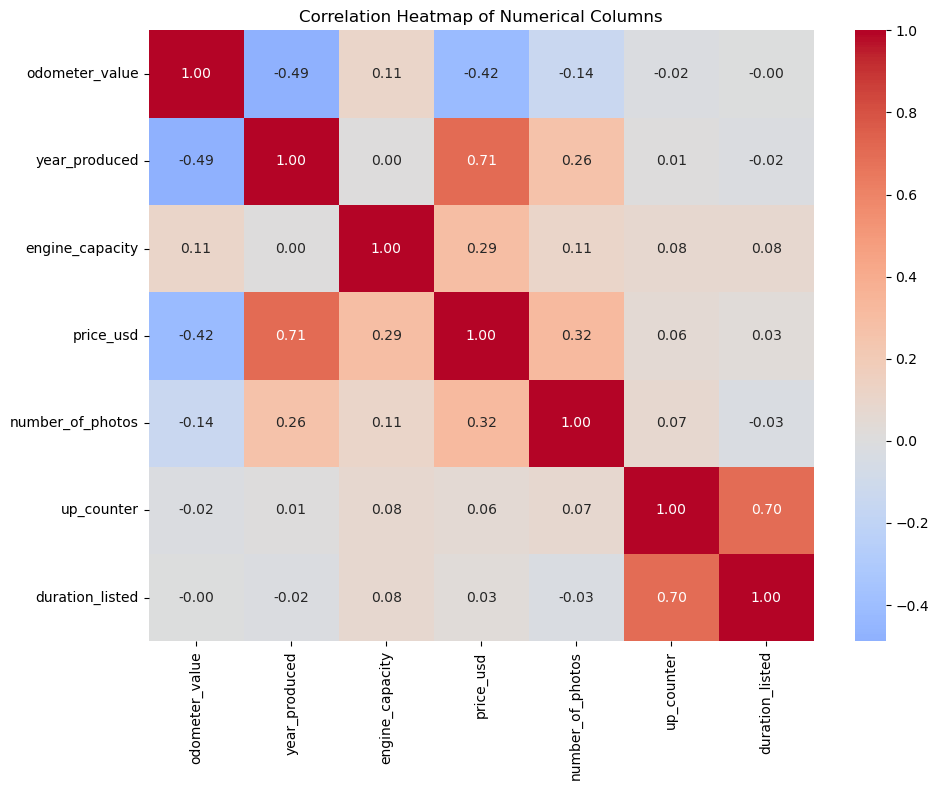

In [14]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_clean[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',  center=0, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Columns')
plt.tight_layout()
plt.show()

### Categorical vs Numerical Data Relationship

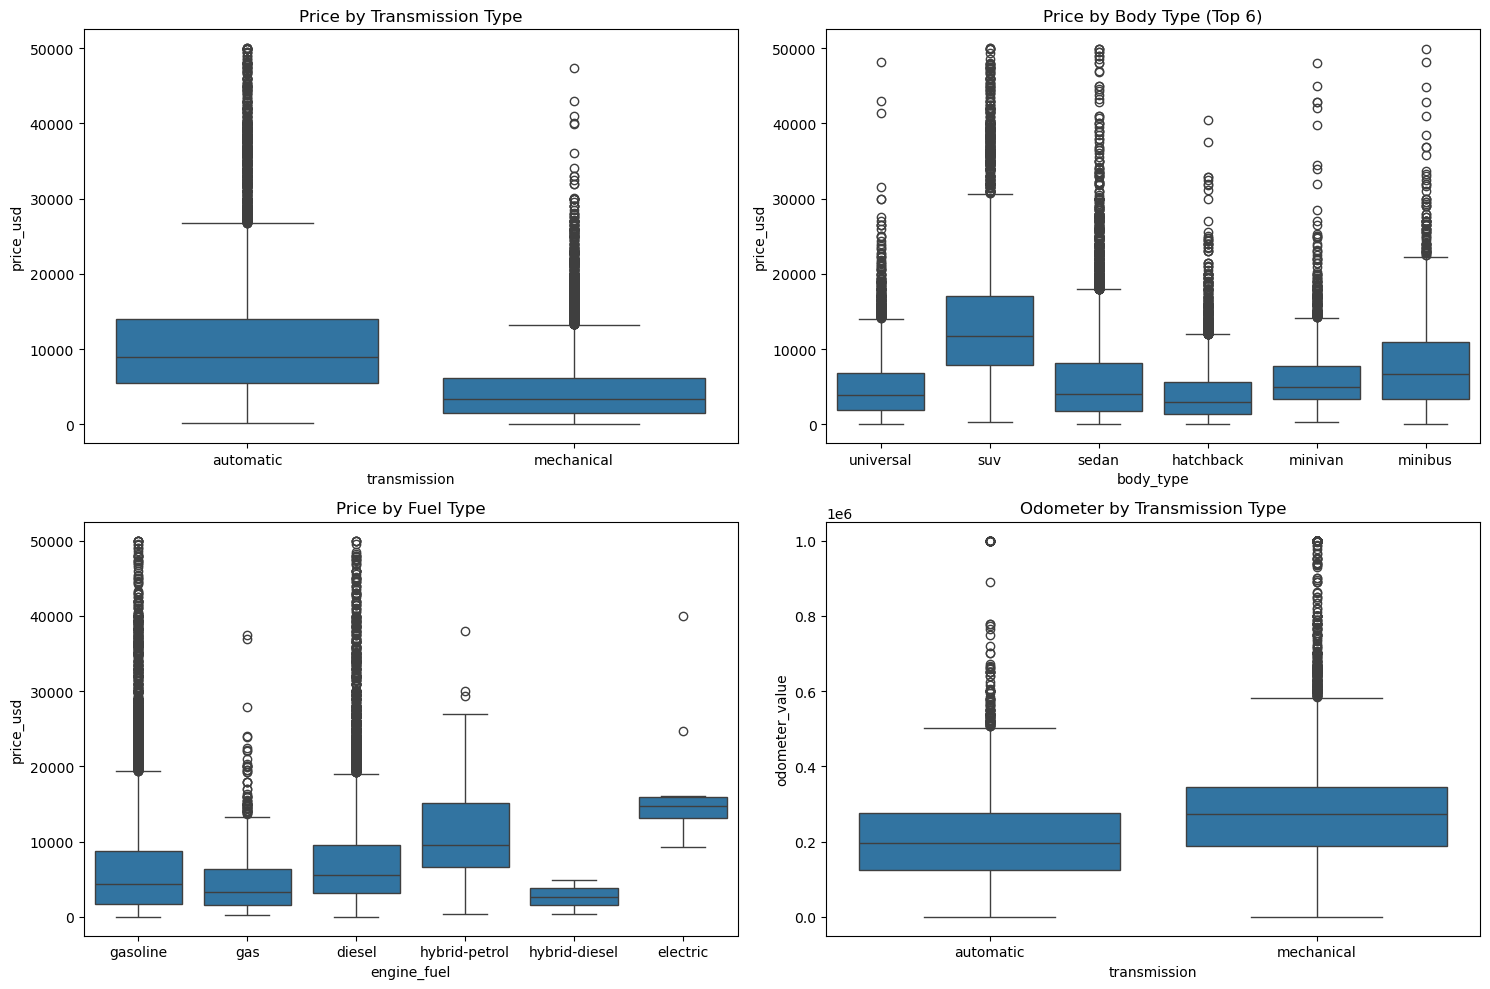

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

sns.boxplot(data=df_clean, x='transmission', y='price_usd', ax=axes[0,0])
axes[0,0].set_title('Price by Transmission Type')
axes[0,0].tick_params(axis='x', rotation=0)

top_body = df_clean['body_type'].value_counts().head(6).index
body_types_filtered = df_clean[df_clean['body_type'].isin(top_body)]
sns.boxplot(data=body_types_filtered, x='body_type', y='price_usd', ax=axes[0,1])
axes[0,1].set_title('Price by Body Type (Top 6)')
axes[0,1].tick_params(axis='x', rotation=0)

sns.boxplot(data=df_clean, x='engine_fuel', y='price_usd', ax=axes[1,0])
axes[1,0].set_title('Price by Fuel Type')

sns.boxplot(data=df_clean, x='transmission', y='odometer_value', ax=axes[1,1])
axes[1,1].set_title('Odometer by Transmission Type')

plt.tight_layout()
plt.show()

## Feature Engineering

In [16]:
def create_recommendation_features(df):
    "Create features for recommendation system"
    df_enhanced = df.copy()

    print("== Creating Recommendation Features ==")

    current_year = 2025
    df_enhanced['car_age'] = current_year - df_enhanced['year_produced']

    price_bins = [0, 10000, 20000, 35000, 80000, float('inf')]
    price_labels = ['Budget', 'Economy', 'Mid-Range', 'Premium', 'Luxury']
    df_enhanced['price_category'] = pd.cut(df_enhanced['price_usd'], bins=price_bins, labels=price_labels, right=False)

    df_enhanced['mileage_category'] = pd.cut(df_enhanced['odometer_value'], bins=[0, 50000, 150000, 300000, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'], right=False)

    feature_cols = [f'feature_{i}' for i in range(10)] + ['engine_has_gas', 'has_warranty', 'is_exchangeable']
    df_enhanced['total_features'] = df_enhanced[feature_cols].sum(axis=1)

    df_enhanced['luxury_score'] = (
        df_enhanced['total_features'] +
        (df_enhanced['engine_capacity'] > 2.5).astype(int) +
        df_enhanced['price_category'].map({'Budget': 0, 'Economy': 1, 'Mid-Range': 2, 'Premium': 3, 'Luxury': 4}).astype(int) +
        (df_enhanced['car_age'] < 10).astype(int)
    )

    print("New featurees created: car_age, price_category, mileagee_category, total_features, luxury_score")
    return df_enhanced

df_enhanced = create_recommendation_features(df_clean)

== Creating Recommendation Features ==
New featurees created: car_age, price_category, mileagee_category, total_features, luxury_score


In [17]:
def validate_cleaned_data(df):
    print("Validate cleanded dataset")
    print("== Data Validation ==")

    print(f"Final dataset shape: {df.shape}")
    print(f"Remaining missing values: {df.isnull().sum()}")

    print("== Detailed Mssing Values ==")
    missing_by_colum = df.isnull().sum()
    missing_by_colum = missing_by_colum[missing_by_colum > 0]

    if len(missing_by_colum) > 0:
        for col, missing_count in missing_by_colum.items():
            print(f"{col}: {missing_count} missing values ({missing_count/len(df)*100:.1f}%)")
    else:
        print("No Missing Values!")

    # Validate num ranges
    print(f"\nPrice range: ${df['price_usd'].min():0f} - ${df['price_usd'].max():.0f}")
    print(f"Odometer Range: {df['odometer_value'].min():0f} KM - {df['odometer_value'].max():.0f} KM")
    print(f"Year Range: {df['year_produced'].min()} - {df['year_produced'].max()}")
    print(f"Car age range: {df['car_age'].min()} - {df['car_age'].max()}")

    # Check new features/column
    print(f"\nPrice categories: {df['price_category'].value_counts().to_dict()}")
    print(f"Mileage categories: {df['mileage_category'].value_counts().to_dict()}")
    print(f"Luxury score range: {df['luxury_score'].min()} - {df['luxury_score'].max()}")

validate_cleaned_data(df_enhanced)

Validate cleanded dataset
== Data Validation ==
Final dataset shape: (38531, 37)
Remaining missing values: manufacturer_name       0
model_name              0
transmission            0
color                   0
odometer_value          0
year_produced           0
engine_fuel             0
engine_has_gas          0
engine_type             0
engine_capacity         0
body_type               0
has_warranty            0
state                   0
drivetrain              0
price_usd               0
is_exchangeable         0
location_region         0
number_of_photos        0
up_counter              0
feature_0               0
feature_1               0
feature_2               0
feature_3               0
feature_4               0
feature_5               0
feature_6               0
feature_7               0
feature_8               0
feature_9               0
duration_listed         0
is_electric             0
engine_capacity_bin    10
car_age                 0
price_category          0
mileage_c

### Cleaned data

In [18]:
df_enhanced.to_csv('../data/processed/cleaned_cars.csv', index=False)
print("Cleaned data saved to '../data/processed/cleaned_cars.csv'")

print("\n=== FINAL DATASET PREVIEW ===")
print(df_enhanced[['manufacturer_name', 'model_name', 'price_usd', 'car_age', 'price_category', 'luxury_score']].head(10))

Cleaned data saved to '../data/processed/cleaned_cars.csv'

=== FINAL DATASET PREVIEW ===
  manufacturer_name model_name  price_usd  car_age price_category  \
0            Subaru    Outback   10900.00       15        Economy   
1            Subaru    Outback    5000.00       23         Budget   
2            Subaru   Forester    2800.00       24         Budget   
3            Subaru    Impreza    9999.00       26         Budget   
4            Subaru     Legacy    2134.11       24         Budget   
5            Subaru    Outback   14700.00       14        Economy   
6            Subaru   Forester    3000.00       27         Budget   
7            Subaru     Legacy    4500.00       21         Budget   
8            Subaru    Outback   12900.00       15        Economy   
9            Subaru   Forester    4200.00       26         Budget   

   luxury_score  
0             8  
1             6  
2             4  
3             3  
4             5  
5             7  
6             6  
7     